<a href="https://colab.research.google.com/github/vneumannufprbr/Computer-Vision/blob/main/PlanoBitsLenaGris256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

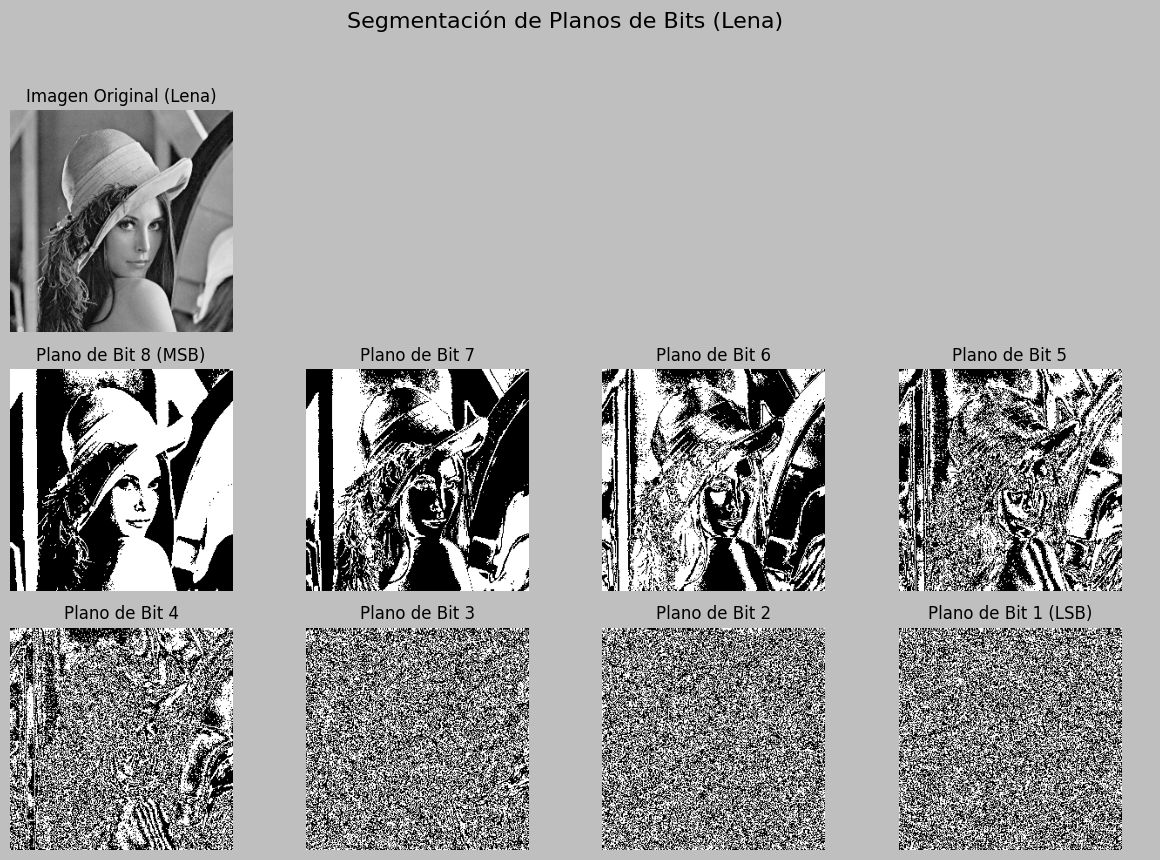

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def load_image_from_github_url(url):
    """Carga una imagen desde una URL de GitHub y la convierte a escala de grises."""
    try:
        # Convertir la URL de GitHub a la URL de contenido raw para la descarga directa
        raw_url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")

        # Descargar la imagen
        response = requests.get(raw_url)
        response.raise_for_status()  # Lanza un error si la descarga falla

        # Abrir la imagen desde la respuesta en memoria y asegurar que esté en escala de grises
        img = Image.open(BytesIO(response.content)).convert('L')
        return np.array(img)
    except requests.exceptions.RequestException as e:
        print(f"Error al descargar la imagen: {e}")
        # Generar una imagen de gradiente como fallback en caso de error
        print("Generando una imagen de gradiente de ejemplo.")
        x = np.arange(256, dtype=np.uint8)
        y = np.arange(256, dtype=np.uint8)
        xx, yy = np.meshgrid(x, y)
        gradient = (xx + yy) // 2
        return gradient

# --- Configuración ---
# URL de la imagen de Lena en tu repositorio de GitHub
image_url = 'https://github.com/vneumannufprbr/Computer-Vision/blob/main/lena_gray_256.tif'

# --- Procesamiento ---
# 1. Cargar la imagen y convertirla a un tensor de TensorFlow
original_image_np = load_image_from_github_url(image_url)
image_tensor = tf.constant(original_image_np, dtype=tf.uint8)

# 2. Preparar la visualización
fig, axes = plt.subplots(3, 4, figsize=(12, 9)) # Cambiado a cuadrícula de 3x4
plt.style.use('grayscale')
fig.suptitle('Segmentación de Planos de Bits (Lena)', fontsize=16)

# Mostrar la imagen original
axes[0, 0].imshow(image_tensor.numpy())
axes[0, 0].set_title('Imagen Original (Lena)')
axes[0, 0].axis('off')

# Ocultar los ejes no utilizados en la primera fila
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[0, 3].axis('off') # Ocultar el eje extra en la primera fila

# 3. Iterar a través de los 8 planos de bits
for i in range(8):
    bit = 7 - i  # Del bit más significativo (7) al menos significativo (0)

    # Crear la máscara (2^bit)
    mask = 2**bit

    # Aplicar AND bit a bit
    bit_plane_raw = tf.bitwise.bitwise_and(image_tensor, mask)

    # Convertir a una imagen binaria visible (0 o 255)
    bit_plane_visible = tf.where(bit_plane_raw > 0, 255, 0)

    # Determinar la posición en la cuadrícula, comenzando desde la segunda fila
    row = (i // 4) + 1  # Cálculo de fila ajustado para 4 columnas
    col = i % 4         # Cálculo de columna ajustado para 4 columnas

    axes[row, col].imshow(bit_plane_visible.numpy())
    title = f'Plano de Bit {bit+1}'
    if bit == 7:
        title += ' (MSB)'
    elif bit == 0:
        title += ' (LSB)'
    axes[row, col].set_title(title)
    axes[row, col].axis('off')


# Limpiar cualquier eje no utilizado en la última fila si es necesario
# Para una cuadrícula de 3x4 y 8 planos de bits, la última fila tendrá los ejes [2, 0] a [2, 3]
# Los planos de bits ocuparán los ejes [1, 0] a [1, 3] y [2, 0] a [2, 3]
# Todos los ejes de la segunda y tercera fila se utilizan para los 8 planos de bits.


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('lena_bit_planes.png')
plt.show()